<a href="https://www.kaggle.com/code/theoneandonlyp/vehicle-type-recognition?scriptVersionId=140688833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Vehicle Type Recognition
## by [Johann](https://www.linkedin.com/in/johann-pineda-97992a235)
---
# Data Info
This is a vehicle image classification dataset containing images of four different types of vehicles: Car, Truck, Bus, and Motorcycle. The dataset is curated to help learners to develop and evaluate image classification models for identifying various vehicle types from images.

The image collection is made into a separate Kaggle notebook.
https://www.kaggle.com/code/kaggleashwin/dataset-collection-for-vehicle-type-recognition
## Data 

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers

# Set the path to the dataset folder
dataset_path = '/kaggle/input/vehicle-type-recognition/Dataset'

# Set the batch size and image size
batch_size = 32
image_size = (224, 224)

# Create an instance of the ImageDataGenerator class for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Found 400 images belonging to 4 classes.
58889256/58889256 [==============================] - 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


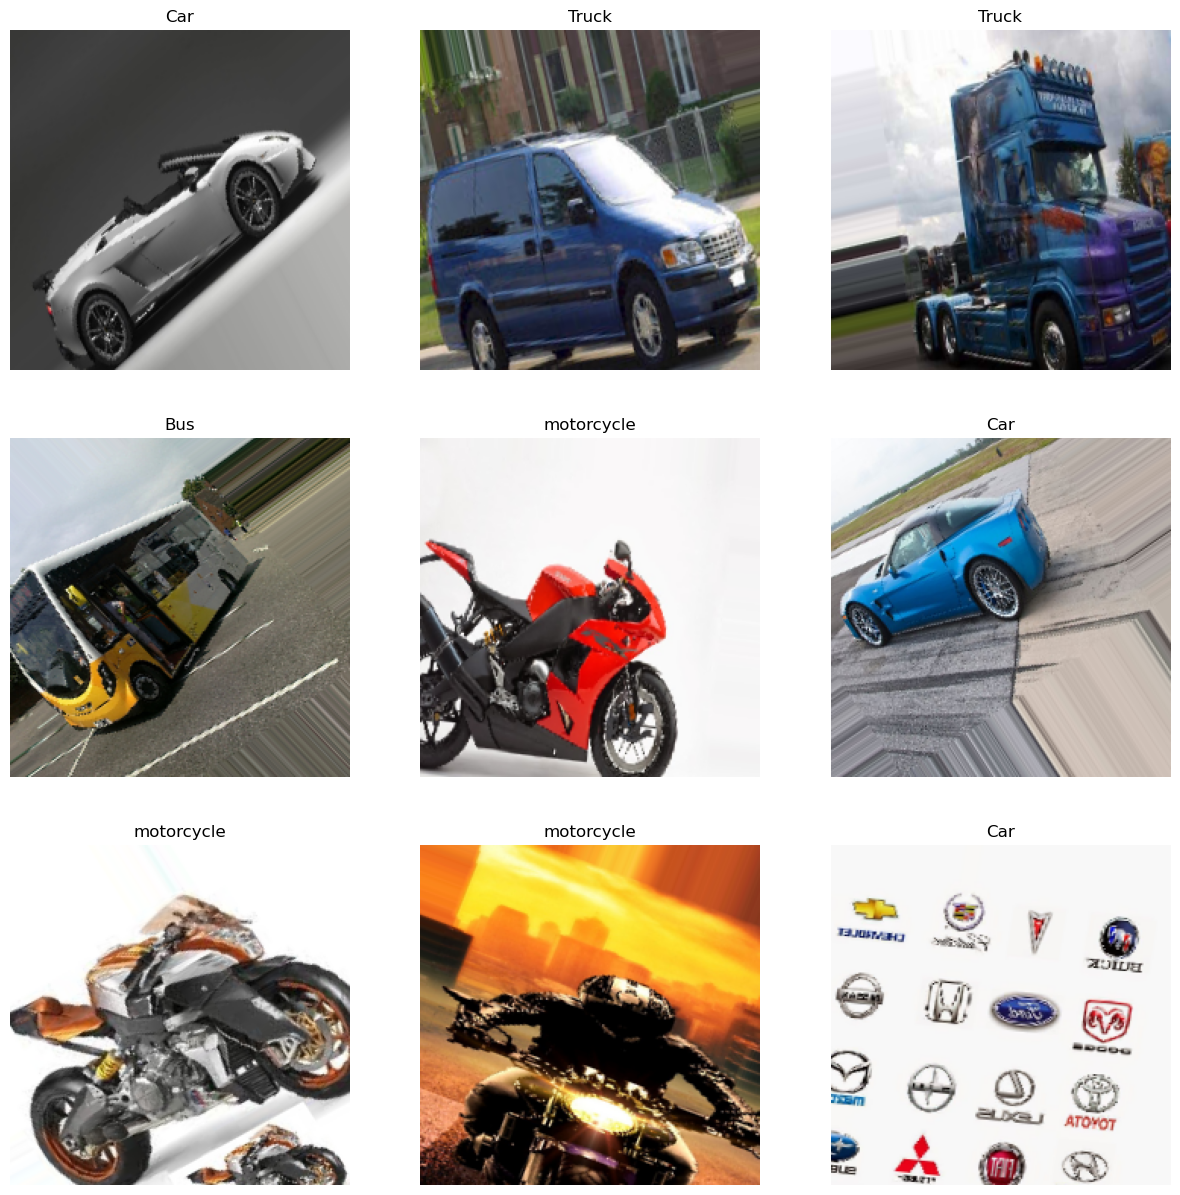

In [3]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    label = np.argmax(label)
    label = class_labels[label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(label)
    ax[i//3, i%3].axis('off')
plt.show()


In [4]:
# Train the model
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=30)

/tmp/ipykernel_33/3109965485.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=30)


Epoch 1/30
12/12 [==============================] - 117s 9s/step - loss: 1.6813 - acc: 0.4484
Epoch 2/30
12/12 [==============================] - 113s 9s/step - loss: 0.7906 - acc: 0.6685
Epoch 3/30
12/12 [==============================] - 116s 10s/step - loss: 0.6724 - acc: 0.6875
Epoch 4/30
12/12 [==============================] - 121s 10s/step - loss: 0.6091 - acc: 0.7266
Epoch 5/30
12/12 [==============================] - 117s 10s/step - loss: 0.5126 - acc: 0.7799
Epoch 6/30
12/12 [==============================] - 113s 9s/step - loss: 0.5314 - acc: 0.7717
Epoch 7/30
12/12 [==============================] - 118s 10s/step - loss: 0.4615 - acc: 0.7943
Epoch 8/30
12/12 [==============================] - 115s 9s/step - loss: 0.3804 - acc: 0.8451
Epoch 9/30
12/12 [==============================] - 112s 9s/step - loss: 0.3902 - acc: 0.8587
Epoch 10/30
12/12 [==============================] - 116s 10s/step - loss: 0.4725 - acc: 0.8151
Epoch 11/30
12/12 [==============================] - 1

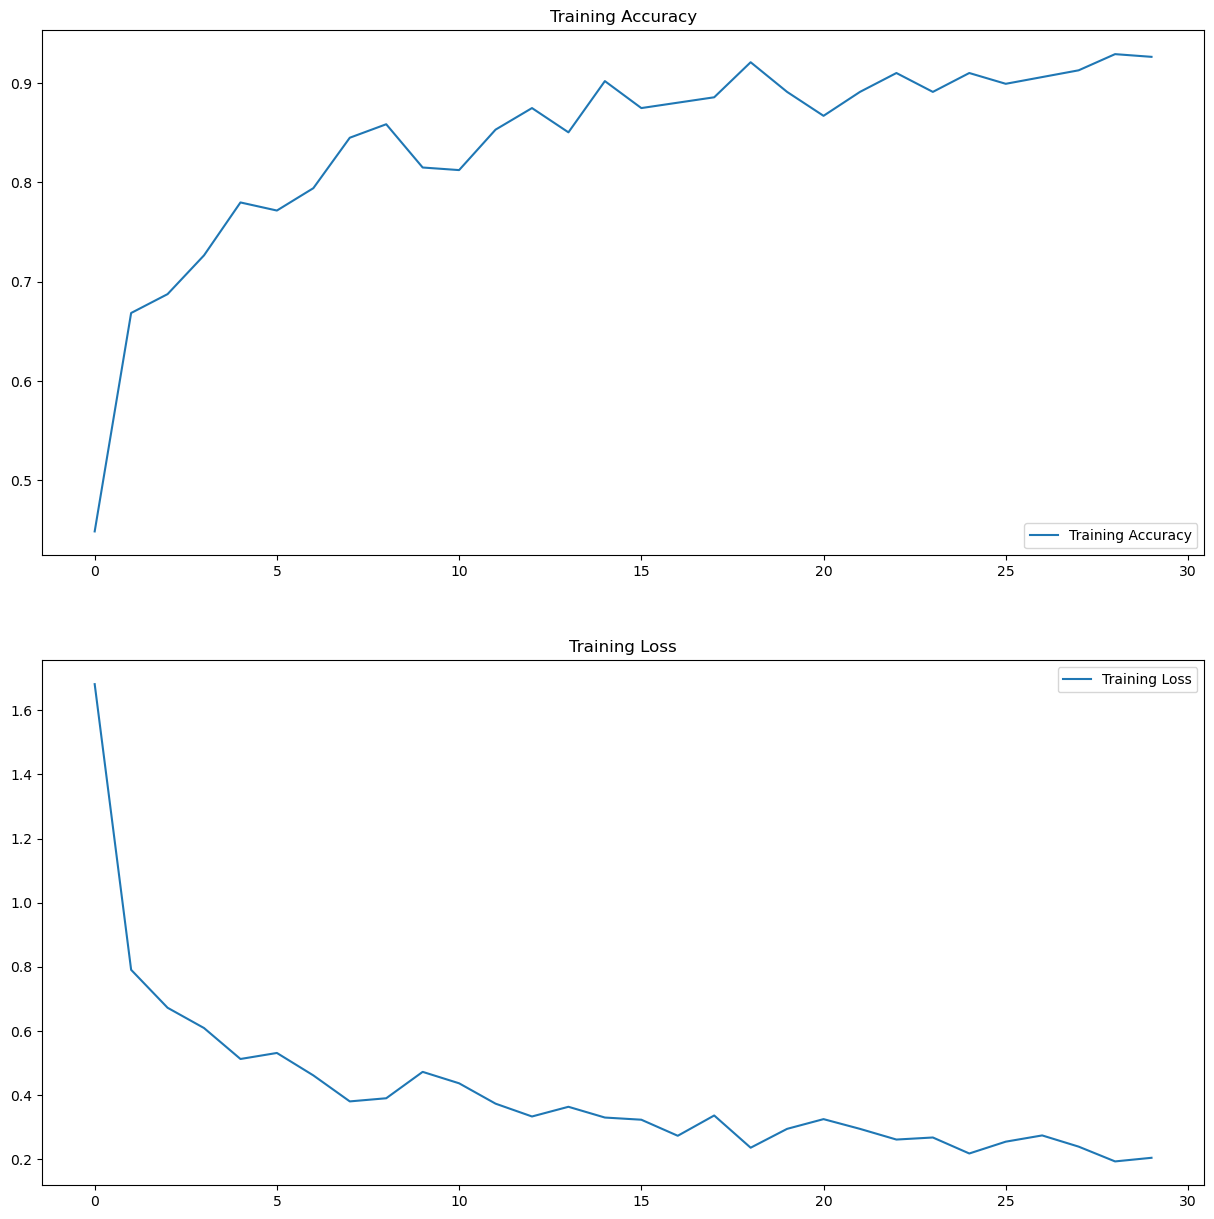

In [5]:
# Display the data

import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

1/1 [==============================] - 0s 317ms/step


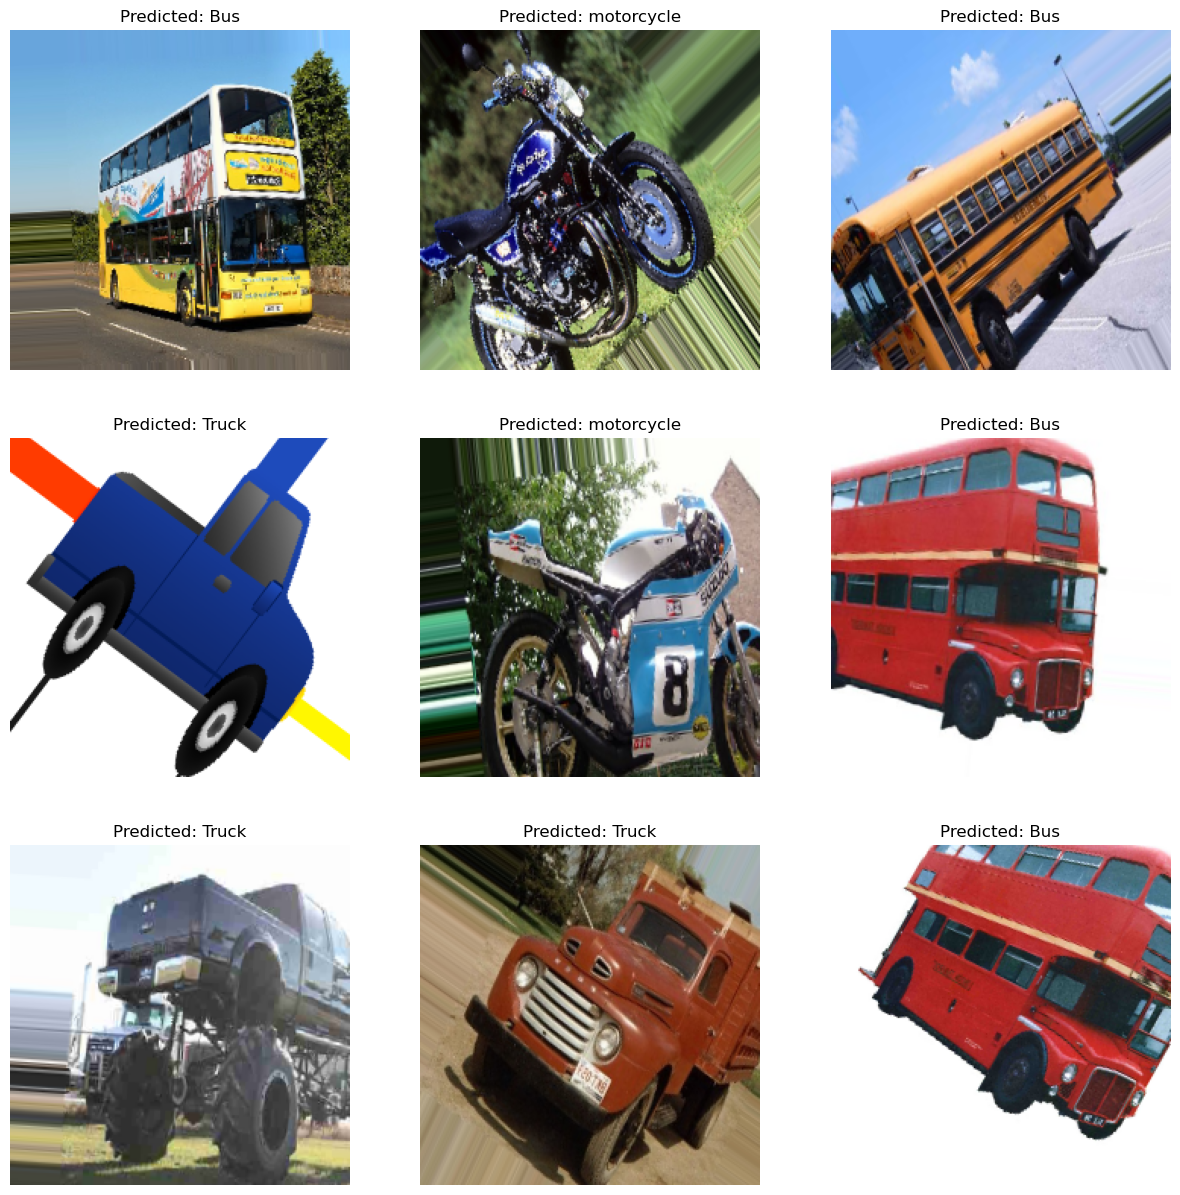

In [6]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their predicted labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    # Get the predicted label
    pred = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred)
    pred_label = class_labels[pred_label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(f'Predicted: {pred_label}')
    ax[i//3, i%3].axis('off')
plt.show()
